conda install prophet

In [3]:
import pandas as pd
from prophet import Prophet

In [4]:
df = pd.read_csv('Volatile.csv')

In [5]:
df.head()

,변환,원자료,원자료.1,원자료.2,원자료.3
0,2001/01/02,"1,259.70",NaN,"1,099.07","1,185.38"
1,2001/01/03,"1,267.80",NaN,"1,108.07","1,205.49"
2,2001/01/04,"1,285.40",NaN,"1,128.53","1,193.24"
3,2001/01/05,"1,249.30",NaN,"1,078.01","1,190.90"
4,2001/01/08,"1,267.80",NaN,"1,088.71","1,215.06"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   변환      5434 non-null   object 
 1   원자료     5434 non-null   object 
 2   원자료.1   1703 non-null   float64
 3   원자료.2   5434 non-null   object 
 4   원자료.3   5434 non-null   object 
dtypes: float64(1), object(4)
memory usage: 212.4+ KB


In [7]:
df.drop(axis=1,columns=['원자료.1','원자료.2','원자료.3'],inplace=True)
df.head()

,변환,원자료
0,2001/01/02,"1,259.70"
1,2001/01/03,"1,267.80"
2,2001/01/04,"1,285.40"
3,2001/01/05,"1,249.30"
4,2001/01/08,"1,267.80"


* 페이스북의 예측 라이브러리가 작동하는 방식은, 데이터셋의 열부분이 ds와 y로 분류 돼있어야한다, 따라서 위에 '변환'이 'ds'가 되고 예측하려는 데이터 레이블은 y가된다 또한 'ds'는 datetime object여야한다
* 이렇게 특정한 열 이름이 필요한 이유는 예측 라이브러리가 내부 연산을 위해 하드 코드가 돼 있기 때문이다

In [8]:
df.columns=['ds','y']

In [9]:
df.columns

Index(['ds', 'y'], dtype='object')

In [10]:
df.head()

,ds,y
0,2001/01/02,"1,259.70"
1,2001/01/03,"1,267.80"
2,2001/01/04,"1,285.40"
3,2001/01/05,"1,249.30"
4,2001/01/08,"1,267.80"


In [11]:
df['ds'] = pd.to_datetime(df['ds'])

In [12]:
df.head()

,ds,y
0,2001-01-02,"1,259.70"
1,2001-01-03,"1,267.80"
2,2001-01-04,"1,285.40"
3,2001-01-05,"1,249.30"
4,2001-01-08,"1,267.80"


* 기본적으로 Prophet은 일간 데이터를 예측한다

In [13]:
#Value String을 Float값으로 바꾸기
for num,i in enumerate(df['y']):
    i=i.replace(',','',1) # count는 변경하고 싶은 횟수 입력
    i=float(i)
    df['y'][num]=i

df['y'].head()

C:\Users\samsung\AppData\Local\Temp\ipykernel_34076\2396833021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'][num]=i


0    1259.7
1    1267.8
2    1285.4
3    1249.3
4    1267.8
Name: y, dtype: object

In [14]:
m = Prophet(interval_width=0.8) #uncertainty interval width의 default는 80%이다
m.fit(df)
# 전체 데이터 셋을 피팅
# Prophet 객체의 하이퍼 파라미터를 보면 Seasonality가 auto임을 확인할 수 있다
# INFO:prophet:Disabling daily seasonality 다음의 의미는 따라서 Prophet모델이 daily seasonality를 찾지 못했으니 비활성화 해둔다는 의미이다
# 만약 어떤 이유로 seasonality를 찾지 못하지만 반영하고 싶다면 True로 설정해두면 된다

11:33:24 - cmdstanpy - INFO - Chain [1] start processing
11:33:28 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# PlaceHolder To hold our future predictions

In [16]:
future = m.make_future_dataframe(periods=24)#어느 정도의 기간만큼 예측할 것인지를 정해줘야 한다
# 만약 Monthly Start data이면 freq='MS' 이런식으로 반영을 해줘야 한다

In [17]:
future #아래의 원데이터와 ds를 비교해봤을때 24일의 차이가 나는 것을 볼 수있다

,ds
0,2001-01-02
1,2001-01-03
2,2001-01-04
3,2001-01-05
4,2001-01-08
...,...
5453,2022-12-15
5454,2022-12-16
5455,2022-12-17
5456,2022-12-18


In [18]:
df.tail(10) 

,ds,y
5424,2022-11-14,1334.1
5425,2022-11-15,1320.3
5426,2022-11-16,1322.4
5427,2022-11-17,1325.6
5428,2022-11-18,1338.4
5429,2022-11-21,1340.0
5430,2022-11-22,1352.3
5431,2022-11-23,1355.7
5432,2022-11-24,1352.3
5433,2022-11-25,1333.2


In [19]:
print(len(df),len(future),sep='')

54345458


In [20]:
forecast = m.predict(future)

In [21]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-02,1289.176521,1235.769248,1353.115338,1289.176521,1289.176521,5.535940,5.535940,5.535940,7.800697,7.800697,7.800697,-2.264757,-2.264757,-2.264757,0.0,0.0,0.0,1294.712461
1,2001-01-03,1289.170373,1234.392108,1352.422835,1289.170373,1289.170373,5.653256,5.653256,5.653256,8.221332,8.221332,8.221332,-2.568076,-2.568076,-2.568076,0.0,0.0,0.0,1294.823629
2,2001-01-04,1289.164225,1238.154781,1349.269347,1289.164225,1289.164225,4.781003,4.781003,4.781003,7.658428,7.658428,7.658428,-2.877425,-2.877425,-2.877425,0.0,0.0,0.0,1293.945228
3,2001-01-05,1289.158077,1234.893551,1353.378494,1289.158077,1289.158077,4.953437,4.953437,4.953437,8.142538,8.142538,8.142538,-3.189101,-3.189101,-3.189101,0.0,0.0,0.0,1294.111514
4,2001-01-08,1289.139634,1232.695481,1347.258277,1289.139634,1289.139634,3.547936,3.547936,3.547936,7.644022,7.644022,7.644022,-4.096086,-4.096086,-4.096086,0.0,0.0,0.0,1292.687569


In [22]:
# 우리가 사용하기 좋은 yhat_lower,yhat_upper,yhat만 추출하자
print(forecast.columns)

forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(12)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


,ds,yhat_lower,yhat_upper,yhat
5446,2022-12-08,1213.306545,1323.308172,1266.686862
5447,2022-12-09,1207.744775,1323.528055,1266.904403
5448,2022-12-10,1181.379801,1290.019303,1238.772880
5449,2022-12-11,1183.830544,1291.790025,1238.532070
5450,2022-12-12,1205.201597,1321.421552,1265.686243
5451,2022-12-13,1211.528434,1320.085107,1265.638941
5452,2022-12-14,1210.253003,1321.886121,1265.876047
5453,2022-12-15,1206.626028,1322.075225,1265.150274
5454,2022-12-16,1206.331607,1322.118854,1265.491562
5455,2022-12-17,1182.546446,1291.706451,1237.491369


In [23]:
f_cast=forecast[['ds','yhat_lower','yhat']]

(18628.0, 19345.0)

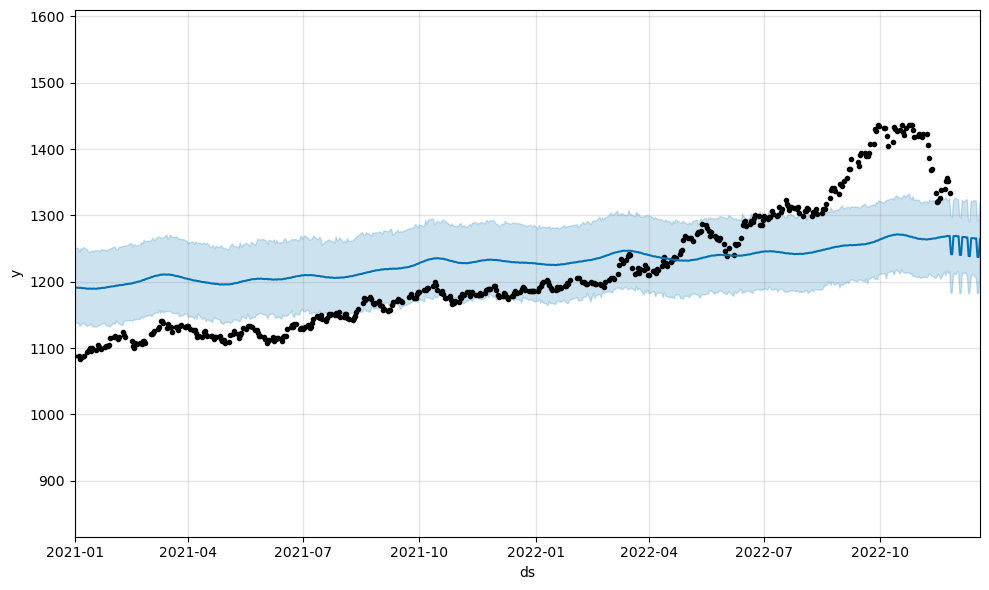

In [24]:
import matplotlib.pyplot as plt
m.plot(forecast)
# 검은 점은 실제로 있는 데이터를 표시하고 있고, 파랑 선은 모델에 의해 예측된 값
Start=pd.to_datetime('2021-01-01')
End=pd.to_datetime('2022-12-19')
plt.xlim(Start,End)
#Start,End에 '2021-01-01' 이렇게 String으로 써주면 Conversion Error가 발생했음
#-> datetime으로 바꿔주니 해결(형식이 다르면 다른 걸로 인식해서 그런듯)

'yhat_upper'


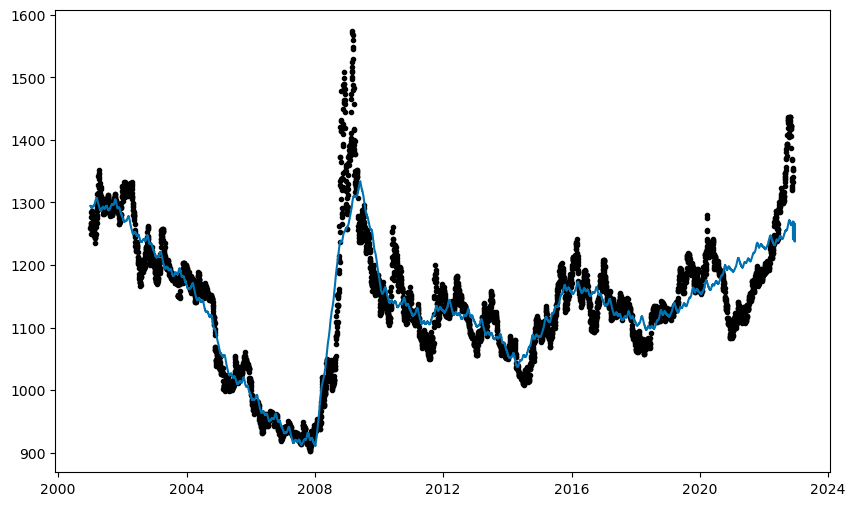

In [25]:
try:
    m.plot(f_cast)
    Start=pd.to_datetime('2021-01-01')
    End=pd.to_datetime('2022-12-19')
    plt.xlim(Start,End)
except KeyError as k:
    print(k)


# plot안에 phropet forecast결과를 넣든 내가 꼭 필요한 임의 추출 결과를 넣든 결과는 똑같음

# yhat_upper를 빼니 오류가 발생됐는데 이를 통해 Prophet에 plot은 스스로 필요한 요소를 추출해서 그림을 알 수 있음
## try~except 구문으로 Key인 yhat_upper를 처리 했다


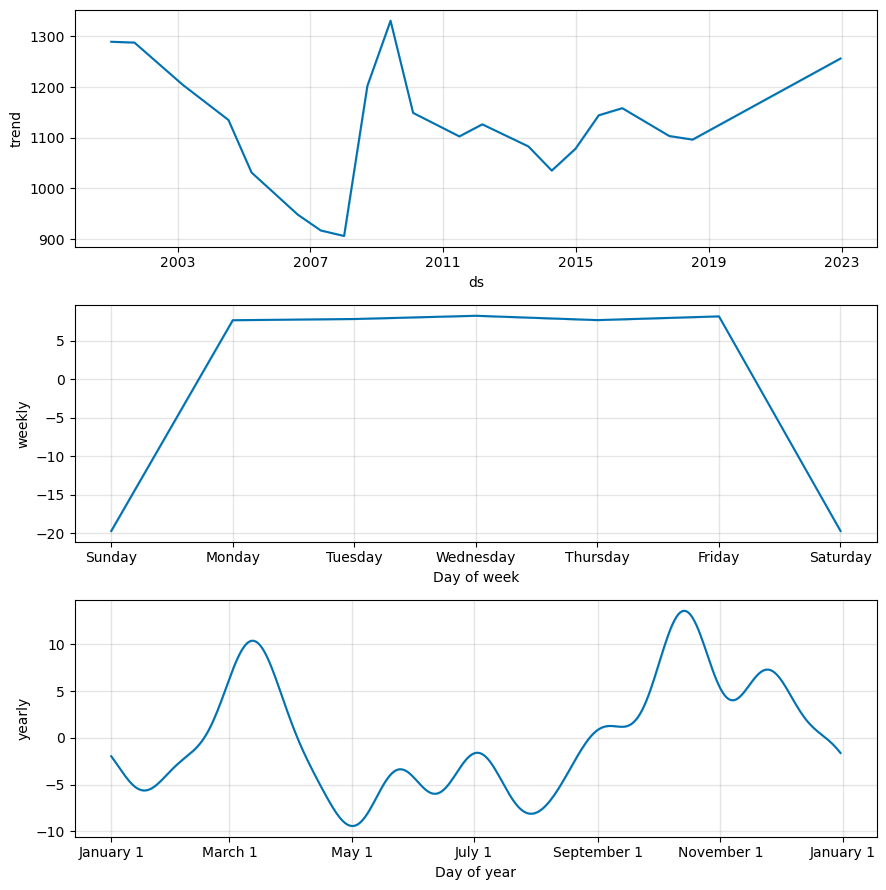

In [26]:
# 컴포넌트를 이용해서 그래프 그리기
m.plot_components(forecast);

* Prophet의 예측평가

In [27]:
len(df)

5434

In [28]:
train = df.iloc[:5410]
test = df.iloc[5410:]

In [29]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=24)
forecast = m.predict(future)

11:33:31 - cmdstanpy - INFO - Chain [1] start processing
11:33:35 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5429,2022-11-13,1243.828607,1171.830280,1282.762880,1243.828607,1243.828607,-17.884270,-17.884270,-17.884270,-18.531183,-18.531183,-18.531183,0.646913,0.646913,0.646913,0.0,0.0,0.0,1225.944338
5430,2022-11-14,1243.919423,1197.854570,1299.226236,1243.919423,1243.919423,8.487034,8.487034,8.487034,7.231909,7.231909,7.231909,1.255125,1.255125,1.255125,0.0,0.0,0.0,1252.406456
5431,2022-11-15,1244.010238,1197.481494,1307.638034,1244.010238,1244.010238,9.191725,9.191725,9.191725,7.296120,7.296120,7.296120,1.895605,1.895605,1.895605,0.0,0.0,0.0,1253.201964
5432,2022-11-16,1244.101053,1199.459360,1310.347249,1244.101053,1244.101053,10.251975,10.251975,10.251975,7.698150,7.698150,7.698150,2.553825,2.553825,2.553825,0.0,0.0,0.0,1254.353028
5433,2022-11-17,1244.191869,1199.814349,1308.216026,1244.191869,1244.191869,10.400987,10.400987,10.400987,7.185561,7.185561,7.185561,3.215426,3.215426,3.215426,0.0,0.0,0.0,1254.592856


In [31]:
train

,ds,y
0,2001-01-02,1259.7
1,2001-01-03,1267.8
2,2001-01-04,1285.4
3,2001-01-05,1249.3
4,2001-01-08,1267.8
...,...,...
5405,2022-10-18,1436.6
5406,2022-10-19,1425.6
5407,2022-10-20,1420.6
5408,2022-10-21,1431.7


In [32]:
test

,ds,y
5410,2022-10-25,1436.6
5411,2022-10-26,1436.5
5412,2022-10-27,1428.2
5413,2022-10-28,1418.1
5414,2022-10-31,1419.3
5415,2022-11-01,1422.2
5416,2022-11-02,1421.7
5417,2022-11-03,1418.0
5418,2022-11-04,1422.1
5419,2022-11-07,1422.4


In [33]:
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5424,2022-11-08,1243.374531,1196.000557,1301.637134,1243.374531,1243.374531,5.865665,5.865665,5.865665,7.296120,7.296120,7.296120,-1.430455,-1.430455,-1.430455,0.0,0.0,0.0,1249.240196
5425,2022-11-09,1243.465346,1194.123862,1305.543353,1243.465346,1243.465346,6.513306,6.513306,6.513306,7.698150,7.698150,7.698150,-1.184843,-1.184843,-1.184843,0.0,0.0,0.0,1249.978652
5426,2022-11-10,1243.556161,1192.497850,1309.363321,1243.556161,1243.556161,6.342499,6.342499,6.342499,7.185561,7.185561,7.185561,-0.843062,-0.843062,-0.843062,0.0,0.0,0.0,1249.898660
5427,2022-11-11,1243.646977,1192.171237,1302.583773,1243.646977,1243.646977,7.234954,7.234954,7.234954,7.650628,7.650628,7.650628,-0.415674,-0.415674,-0.415674,0.0,0.0,0.0,1250.881930
5428,2022-11-12,1243.737792,1170.420646,1280.809224,1243.737792,1243.737792,-18.445838,-18.445838,-18.445838,-18.531186,-18.531186,-18.531186,0.085348,0.085348,0.085348,0.0,0.0,0.0,1225.291954
5429,2022-11-13,1243.828607,1171.830280,1282.762880,1243.828607,1243.828607,-17.884270,-17.884270,-17.884270,-18.531183,-18.531183,-18.531183,0.646913,0.646913,0.646913,0.0,0.0,0.0,1225.944338
5430,2022-11-14,1243.919423,1197.854570,1299.226236,1243.919423,1243.919423,8.487034,8.487034,8.487034,7.231909,7.231909,7.231909,1.255125,1.255125,1.255125,0.0,0.0,0.0,1252.406456
5431,2022-11-15,1244.010238,1197.481494,1307.638034,1244.010238,1244.010238,9.191725,9.191725,9.191725,7.296120,7.296120,7.296120,1.895605,1.895605,1.895605,0.0,0.0,0.0,1253.201964
5432,2022-11-16,1244.101053,1199.459360,1310.347249,1244.101053,1244.101053,10.251975,10.251975,10.251975,7.698150,7.698150,7.698150,2.553825,2.553825,2.553825,0.0,0.0,0.0,1254.353028
5433,2022-11-17,1244.191869,1199.814349,1308.216026,1244.191869,1244.191869,10.400987,10.400987,10.400987,7.185561,7.185561,7.185561,3.215426,3.215426,3.215426,0.0,0.0,0.0,1254.592856


<AxesSubplot:xlabel='ds'>

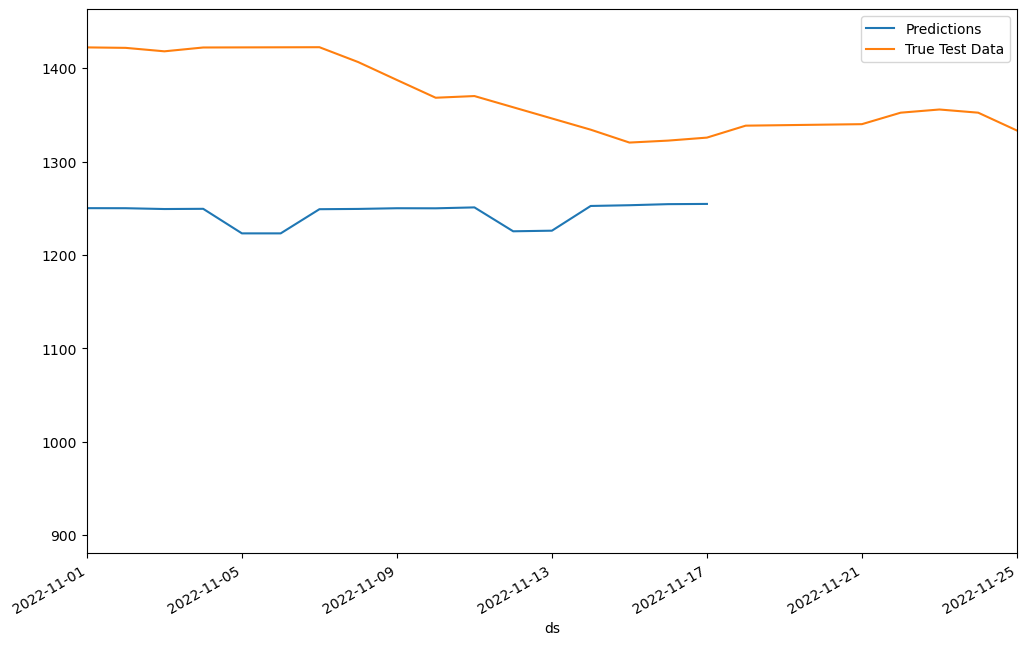

In [34]:
start = pd.to_datetime('2022-11-01')
end = pd.to_datetime('2022-11-25') 
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend = True,figsize=(12,8))
test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=(start,end))
# 데이터에 휴일정보는 빠져있기 때문에 다음과 같은 결과가 나왔음

* 환율은 공휴일인 경우 그 전날의 기준 환율을 기준으로 한다

In [35]:
import datetime
# datetime 모듈의 timedelta를 사용하면 날짜를 더하고 뺄 수 있다
a=pd.to_datetime('2022-10-01')
a + datetime.timedelta(days=1)

Timestamp('2022-10-02 00:00:00')

In [36]:
new_df=df.copy()
add_index=0
for num,i in enumerate(df['ds']):
    if num!=5433:
        while df['ds'][num+1]-new_df['ds'][num+add_index] > datetime.timedelta(1):
            holdate=(new_df['ds'][num+add_index]+datetime.timedelta(days=1))
            new_row=pd.DataFrame({'ds':[holdate],'y':[df['y'][num]]})
            # 데이터 프레임을 만들때 모든 Value가 스칼라일 경우 오류가 발생하므로 리스트를 사용해서 
            # 데이터 프레임을 만들어 주거나 ,index하고 index를 range로 작성해주면 된다
            # pandas DataFrame: ValueError: If using all scalar values, you must pass an index
            new_df=pd.concat([new_df.iloc[:num+1+add_index],new_row,new_df.iloc[num+1+add_index:]],ignore_index=True)
            add_index=add_index+1
        
    else: break

new_df

,ds,y
0,2001-01-02,1259.7
1,2001-01-03,1267.8
2,2001-01-04,1285.4
3,2001-01-05,1249.3
4,2001-01-06,1249.3
...,...,...
7993,2022-11-21,1340.0
7994,2022-11-22,1352.3
7995,2022-11-23,1355.7
7996,2022-11-24,1352.3


In [37]:
display(df.loc[:1])
display(df.iloc[-10:])
# loc는 마지막 포함, iloc는 마지막 포함 x

,ds,y
0,2001-01-02,1259.7
1,2001-01-03,1267.8


,ds,y
5424,2022-11-14,1334.1
5425,2022-11-15,1320.3
5426,2022-11-16,1322.4
5427,2022-11-17,1325.6
5428,2022-11-18,1338.4
5429,2022-11-21,1340.0
5430,2022-11-22,1352.3
5431,2022-11-23,1355.7
5432,2022-11-24,1352.3
5433,2022-11-25,1333.2


In [38]:
new_df.tail(10)

,ds,y
7988,2022-11-16,1322.4
7989,2022-11-17,1325.6
7990,2022-11-18,1338.4
7991,2022-11-19,1338.4
7992,2022-11-20,1338.4
7993,2022-11-21,1340.0
7994,2022-11-22,1352.3
7995,2022-11-23,1355.7
7996,2022-11-24,1352.3
7997,2022-11-25,1333.2


In [39]:
a=pd.to_datetime('2022-10-01')
b=pd.to_datetime('2022-09-30')
c=datetime.timedelta(1)
a-b==c

True

11:33:41 - cmdstanpy - INFO - Chain [1] start processing
11:33:45 - cmdstanpy - INFO - Chain [1] done processing


<AxesSubplot:xlabel='ds'>

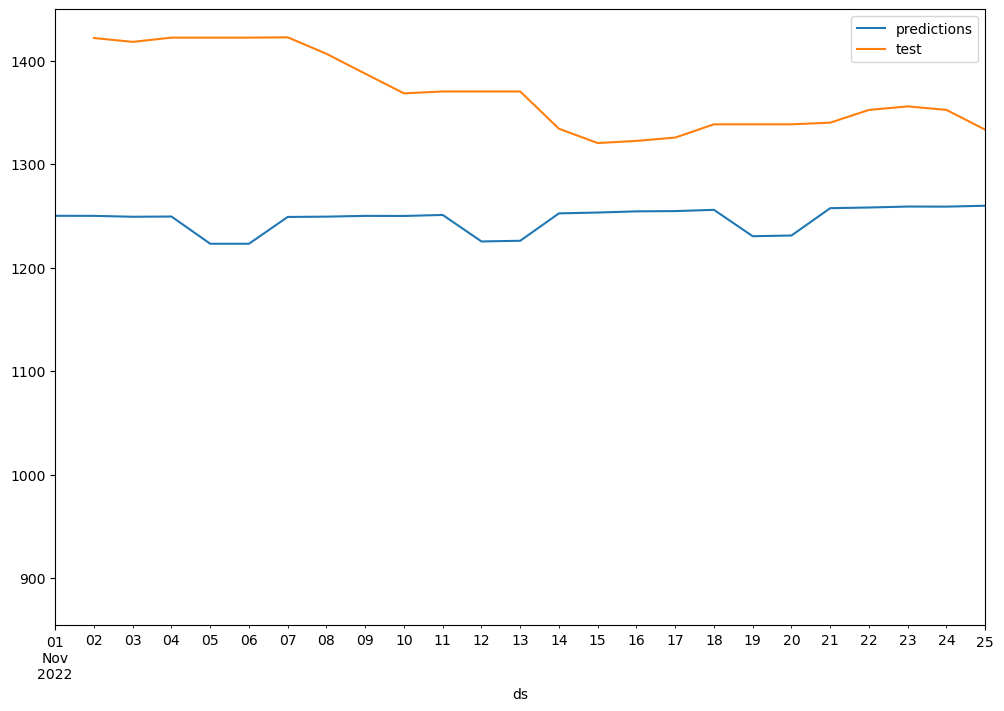

In [40]:
new_train=new_df.iloc[:-24]
new_test=new_df.iloc[-24:]
new_m = Prophet().fit(new_train)
future = new_m.make_future_dataframe(periods=24) #future는 미래의 period dataframe을 만들어주는 과정
forecast = m.predict(future) # 실제로 예측하는 과정

ax=forecast.plot(x='ds',y='yhat',figsize=(12,8),legend=True,label='predictions');
new_test.plot(x='ds',y='y',ax=ax,legend=True,label='test',xlim=(start,end))

## 성능 Test

In [41]:
from statsmodels.tools.eval_measures import rmse

In [42]:
predictions = forecast.iloc[-24:]['yhat']

In [43]:
predictions

7974    1249.997921
7975    1249.130601
7976    1249.358696
7977    1223.059756
7978    1223.062183
7979    1248.944613
7980    1249.240196
7981    1249.978652
7982    1249.898660
7983    1250.881930
7984    1225.291954
7985    1225.944338
7986    1252.406456
7987    1253.201964
7988    1254.353028
7989    1254.592856
7990    1255.799845
7991    1230.336363
7992    1231.019049
7993    1257.418396
7994    1258.063126
7995    1258.982252
7996    1258.917392
7997    1259.756667
Name: yhat, dtype: float64

In [44]:
new_test['y']

7974    1421.7
7975    1418.0
7976    1422.1
7977    1422.1
7978    1422.1
7979    1422.4
7980    1406.5
7981    1387.3
7982    1368.3
7983    1370.1
7984    1370.1
7985    1370.1
7986    1334.1
7987    1320.3
7988    1322.4
7989    1325.6
7990    1338.4
7991    1338.4
7992    1338.4
7993    1340.0
7994    1352.3
7995    1355.7
7996    1352.3
7997    1333.2
Name: y, dtype: object

In [45]:
rmse(predictions,new_test['y'])

129.22464042285168

In [46]:
new_test.mean()

C:\Users\samsung\AppData\Local\Temp\ipykernel_34076\3546729548.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  new_test.mean()


y    1368.829167
dtype: float64

* Prophet은 교차검증을 수행하기 위한 자체 진단 기능이 있다

In [47]:
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

교차검증을 실행하려면 정해줘야 할 3가지 요소가 있다
* INITIAL TRAINING PERIOD - 초기 훈련 기간 정한후 모델을 훈련시키기
* PERIOD LENGTH - Cross-validation을 진행할 length를 정하고
* HORIZON - 각각의 length에 대해 예측 기간을 정함

In [48]:
initial = 3*365 # 초기 훈련기간을 5년으로 잡음
initial = str(initial) + ' days' #형식을 이와같이 하지 않으면 작동하지 않음

In [49]:
initial

'1095 days'

In [50]:
period = 3*365
period = str(period) + ' days'
period

'1095 days'

In [51]:
horizon = 365
horizon = str(horizon) + ' days'

In [52]:
df_cv = cross_validation(new_m,initial=initial,period=period,horizon=horizon)

  0%|          | 0/6 [00:00<?, ?it/s]

11:33:48 - cmdstanpy - INFO - Chain [1] start processing
11:33:49 - cmdstanpy - INFO - Chain [1] done processing
11:33:50 - cmdstanpy - INFO - Chain [1] start processing
11:33:51 - cmdstanpy - INFO - Chain [1] done processing
11:33:52 - cmdstanpy - INFO - Chain [1] start processing
11:33:57 - cmdstanpy - INFO - Chain [1] done processing
11:33:57 - cmdstanpy - INFO - Chain [1] start processing
11:34:02 - cmdstanpy - INFO - Chain [1] done processing
11:34:03 - cmdstanpy - INFO - Chain [1] start processing
11:34:09 - cmdstanpy - INFO - Chain [1] done processing
11:34:10 - cmdstanpy - INFO - Chain [1] start processing
11:34:19 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2006-11-06,956.897638,943.337818,970.498956,937.9,2006-11-05
1,2006-11-07,956.033157,941.719142,968.633009,941.2,2006-11-05
2,2006-11-08,955.036616,940.791388,969.420467,940.7,2006-11-05
3,2006-11-09,953.949175,940.690408,968.179187,935.8,2006-11-05
4,2006-11-10,952.724587,939.507055,966.455699,936.7,2006-11-05


In [54]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2006-11-06,956.897638,943.337818,970.498956,937.9,2006-11-05
1,2006-11-07,956.033157,941.719142,968.633009,941.2,2006-11-05
2,2006-11-08,955.036616,940.791388,969.420467,940.7,2006-11-05
3,2006-11-09,953.949175,940.690408,968.179187,935.8,2006-11-05
4,2006-11-10,952.724587,939.507055,966.455699,936.7,2006-11-05
...,...,...,...,...,...,...
2185,2022-10-28,1188.210127,1071.380764,1282.824591,1418.1,2021-11-01
2186,2022-10-29,1187.566809,1080.706442,1285.965302,1418.1,2021-11-01
2187,2022-10-30,1186.974926,1069.774182,1295.604814,1418.1,2021-11-01
2188,2022-10-31,1186.465409,1080.641190,1293.040472,1419.3,2021-11-01


In [55]:
len(df_cv)

2190

In [56]:
performance_metrics(df_cv,rolling_window=0.1) #0.01로 할시 4부터 시작
# 각 예측기간이 나오게 된다

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,13318.107506,115.404105,64.873820,0.056780,0.022457,0.052629,0.643836
1,38 days,13446.771689,115.960216,65.200658,0.057068,0.022921,0.052883,0.643836
2,39 days,13570.781012,116.493695,65.581047,0.057407,0.022457,0.053190,0.643836
3,40 days,13687.399435,116.993160,65.966534,0.057747,0.024551,0.053503,0.643836
4,41 days,13795.818133,117.455601,66.343606,0.058077,0.024233,0.053810,0.643836
...,...,...,...,...,...,...,...,...
324,361 days,49708.315416,222.953617,150.154856,0.126953,0.058595,0.117357,0.666667
325,362 days,50078.378493,223.781989,150.482594,0.127273,0.062104,0.117544,0.666667
326,363 days,50459.835015,224.632667,150.844888,0.127643,0.056810,0.117769,0.666667
327,364 days,50826.199563,225.446667,151.159647,0.127970,0.060095,0.117956,0.666667


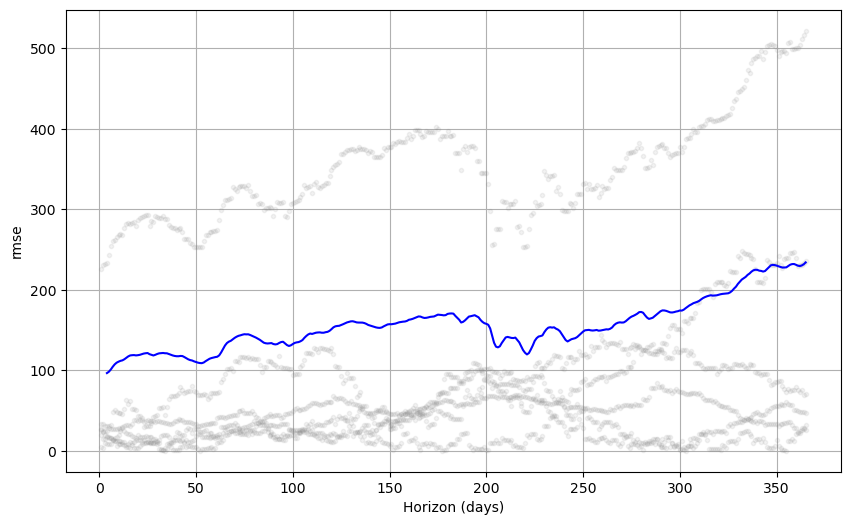

In [57]:
plot_cross_validation_metric(df_cv,metric='rmse',rolling_window=0.01);

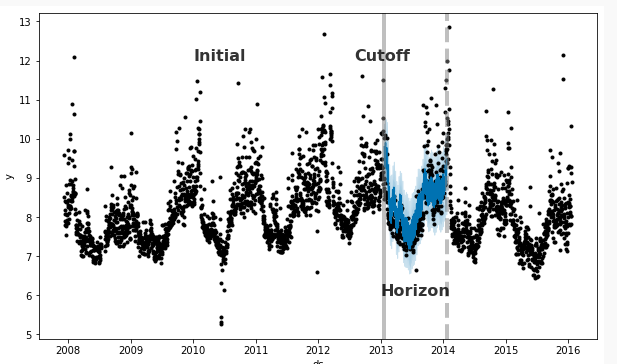
Prophet은 Cutoff point들을 선택함으로써 cross validation을 진행한다 cutoff point까지의 데이터를 사용해서 모델을 피팅한다. 그 이후 forecasted value와 actual value를 비교한다 위의 그림은 Peyton Manning dataset에 대해 simulated historical forecast를 그린 그림이다. 모델은 초기 5년에 대해 피팅 됐고 one year horizon에 대해 forecasting이 됐다

<br>
위에 설명을 부연하자면
horizon: forecast horizon을 말함
initial: 초기에 training시킬 period를 의미함
period: cutoff dates 사이에 기간을 의미한다
</br>

cross_validation의 output은 true values y, out-of-sample forecast values yhat이 포함된 dataframe이다
특히 forecast는 cutoff 와 cutoff+horizon 사이에 모든 관찰된 포인트에 대해서 만들어진다(forecasting이 cutoff+1부터 cutoff+horizon 사이에 대해 진행됨)
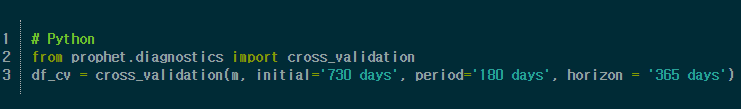
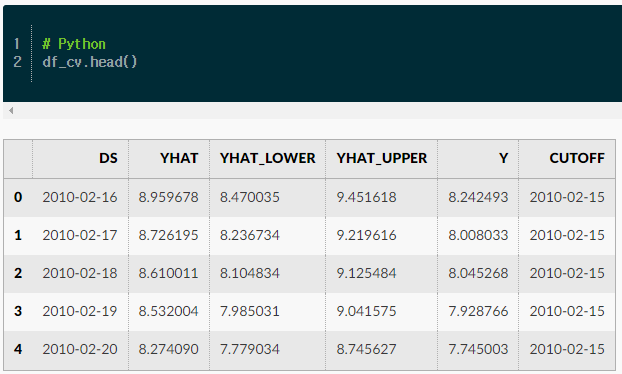
<br>
Time series의 cross validation은 이전에 classical forecasting method를 할때 공부했었다
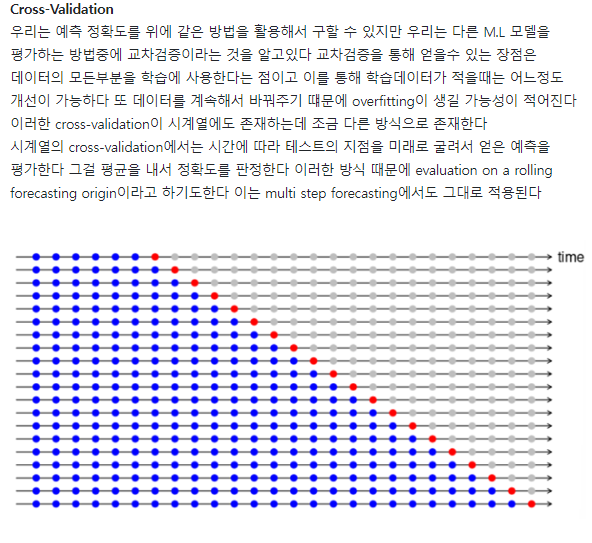
[출처: own blog ] 
https://velog.io/@leesungjoon-net/Classical-TimeSeries-Forecasting-With-Basic
</br>
Performance_metrics utility는 prediction performance(yhat, yhat_lower, and yhat_upper compared to y)의 몇몇 유용한 통계량(mse,rmse 등등)을 계산하는데 사용할수 있다 이는 cutoff로 부터의 거리의 함수이다
이들은 df_cv에서 예측을 rolling window(forecasting horizon의 10%가 default 값)를 통해 계산된다 after sorting by horizon(ds minus cutoff).
각각의 값은 모든 forecast horizon에 대해서 cutoff와의 거리를 기준으로 값을 평균낸 값이다
<br>-> 이를 통해 어떤 lag를 갖는 예측이 가장 좋을지 알 수 있다</br>